In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
education_file_paths = ['./csv/education/australia.csv', './csv/education/finland.csv', './csv/education/france.csv',
              './csv/education/italy.csv', './csv/education/japan.csv', './csv/education/korea.csv',
              './csv/education/netherlands.csv', './csv/education/poland.csv', './csv/education/singapore.csv',
              './csv/education/switerland.csv']

health_file_paths = ['./csv/health/canada.csv', './csv/health/france.csv',
               './csv/health/italy.csv', './csv/health/japan.csv',
              './csv/health/poland.csv', './csv/health/sweden.csv']

In [3]:
def read_and_transform_csv(education_file_paths):
    list_of_dataframes = {}
    for path in education_file_paths:
        name = path.split('/')[-1].split('.')[0]
        df = pd.read_csv(path)

        df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
        df['Value'].fillna(0, inplace=True)
        df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
        df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')

        df.dropna(inplace=True)
        df.reset_index(drop=True, inplace=True)
        list_of_dataframes[name] = df
    return list_of_dataframes

lista = read_and_transform_csv(education_file_paths)

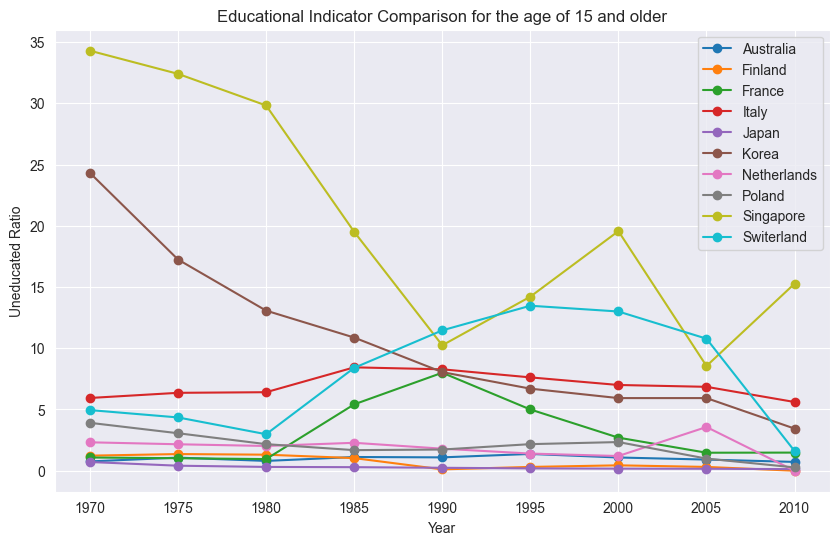

In [4]:

countries = ['australia', 'finland', 'france', 'italy', 'japan', 'korea', 'netherlands', 'poland', 'singapore', 'switerland']

age_and_gender_groups = ['BAR.NOED.1519.FE.ZS', 'BAR.NOED.1519.ZS','BAR.NOED.15UP.FE.ZS', 'BAR.NOED.15UP.ZS',
              'BAR.NOED.2024.FE.ZS', 'BAR.NOED.2024.ZS',
              'BAR.NOED.2529.FE.ZS', 'BAR.NOED.2529.ZS', 'BAR.NOED.25UP.FE.ZS', 'BAR.NOED.25UP.ZS',
              'BAR.NOED.3034.FE.ZS', 'BAR.NOED.3034.ZS',
              'BAR.NOED.3539.FE.ZS', 'BAR.NOED.3539.ZS',
              'BAR.NOED.4044.FE.ZS', 'BAR.NOED.4044.ZS',
              'BAR.NOED.4549.FE.ZS', 'BAR.NOED.4549.ZS',
              'BAR.NOED.5054.FE.ZS', 'BAR.NOED.5054.ZS',
              'BAR.NOED.5559.FE.ZS', 'BAR.NOED.5559.ZS',
              'BAR.NOED.6064.FE.ZS', 'BAR.NOED.6064.ZS']

indicator_code = 'BAR.NOED.15UP.ZS'

plt.figure(figsize=(10, 6))


for country in countries:
    df_country = lista[country]
    df_indicator = df_country[df_country['Indicator Code'] == indicator_code]

    plt.plot(df_indicator['Year'], df_indicator['Value'], marker='o', label=country.capitalize())


plt.xlabel('Year')
plt.ylabel('Uneducated Ratio')
plt.title(f'Educational Indicator Comparison for the age of 15 and older')
plt.legend()
plt.grid(True)
plt.show()

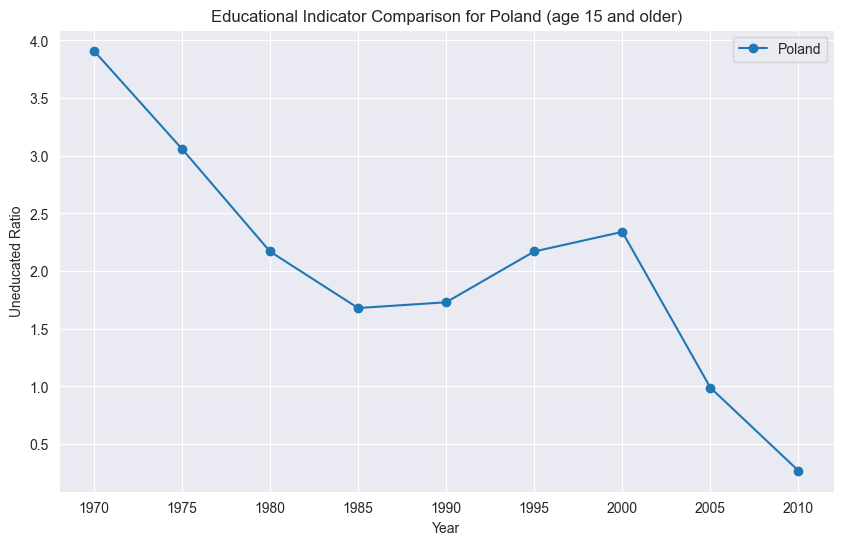

In [5]:
selected_country = 'poland'
df_poland = lista[selected_country]

df_poland_indicator = df_poland[df_poland['Indicator Code'] == indicator_code]

plt.figure(figsize=(10, 6))
plt.plot(df_poland_indicator['Year'], df_poland_indicator['Value'], marker='o', label='Poland')

plt.xlabel('Year')
plt.ylabel('Uneducated Ratio')
plt.title(f'Educational Indicator Comparison for {selected_country.capitalize()} (age 15 and older)')
plt.legend()
plt.grid(True)
plt.show()

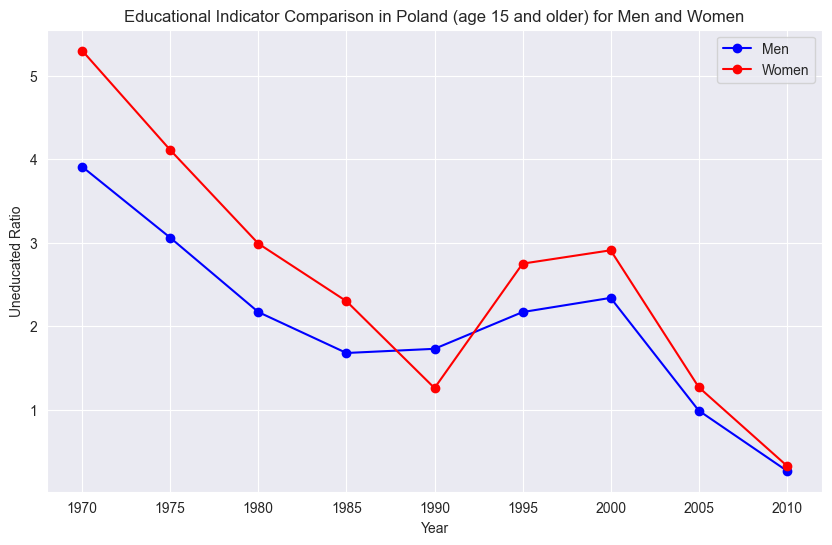

In [6]:
indicator_code_men = 'BAR.NOED.15UP.ZS'
indicator_code_women = 'BAR.NOED.15UP.FE.ZS'

df_poland_men = df_poland[df_poland['Indicator Code'] == indicator_code_men]
df_poland_women = df_poland[df_poland['Indicator Code'] == indicator_code_women]

plt.figure(figsize=(10, 6))
plt.plot(df_poland_men['Year'], df_poland_men['Value'], marker='o', label='Men', color='b')
plt.plot(df_poland_women['Year'], df_poland_women['Value'], marker='o', label='Women', color='r')

plt.xlabel('Year')
plt.ylabel('Uneducated Ratio')
plt.title(f'Educational Indicator Comparison in Poland (age 15 and older) for Men and Women')
plt.legend()
plt.grid(True)
plt.show()


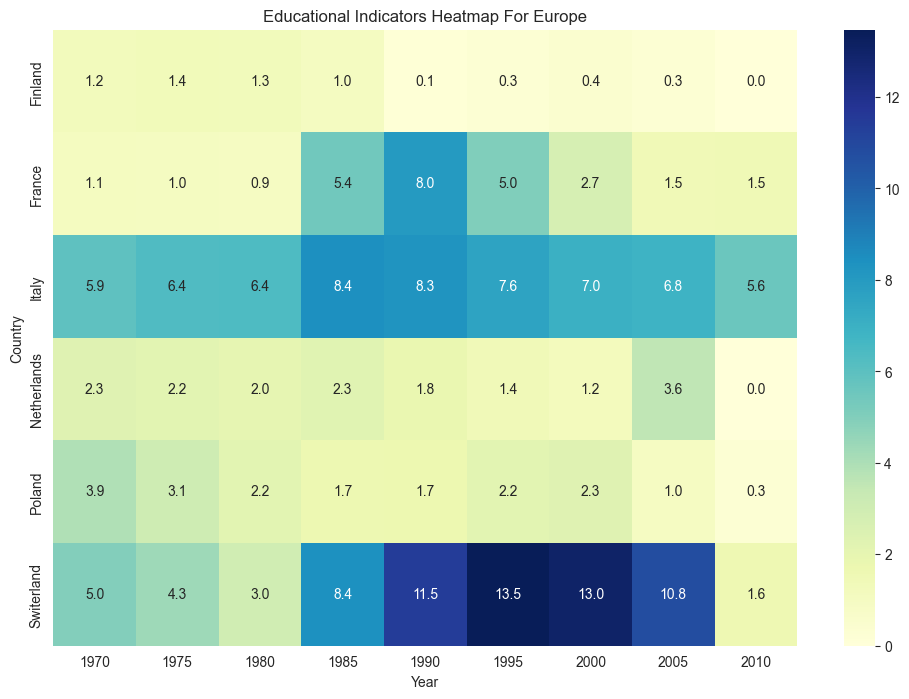

In [7]:
selected_countries = ['poland', 'italy', 'france', 'switerland', 'finland', 'netherlands']
selected_indicators = ['BAR.NOED.15UP.ZS']

data = []

for country in selected_countries:
    for indicator_code in selected_indicators:
        df_country_indicator = lista[country][lista[country]['Indicator Code'] == indicator_code]
        data.extend(list(zip(df_country_indicator['Year'].dt.year, [country.capitalize()] * len(df_country_indicator), df_country_indicator['Value'], [indicator_code] * len(df_country_indicator))))

df_heatmap = pd.DataFrame(data, columns=['Year', 'Country', 'Value', 'Indicator Code'])

plt.figure(figsize=(12, 8))
heatmap_data = df_heatmap.pivot_table(index='Country', columns='Year', values='Value', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Educational Indicators Heatmap For Europe')
plt.show()

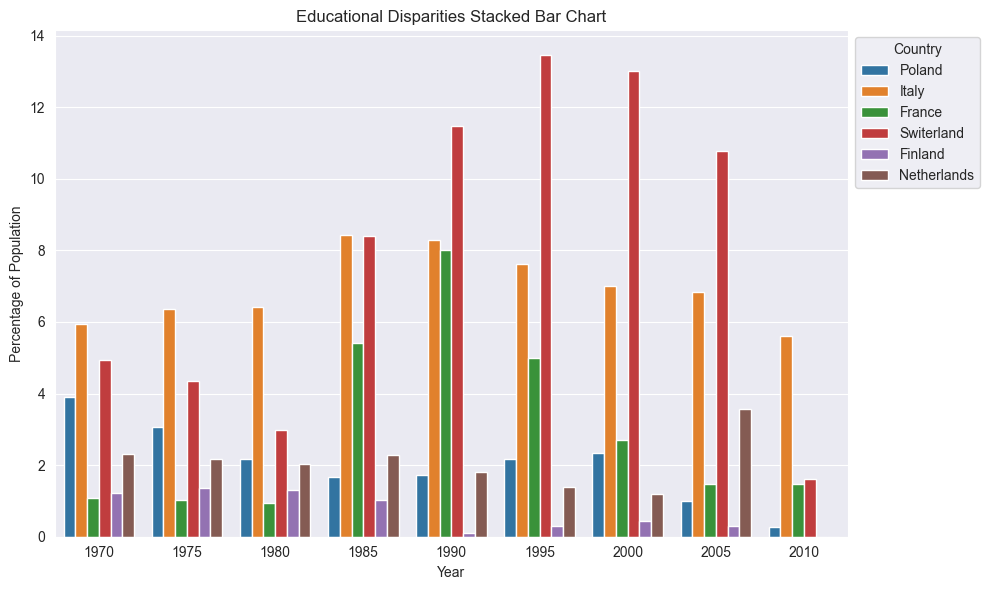

In [8]:
selected_countries = ['poland', 'italy', 'france', 'switerland', 'finland', 'netherlands']
selected_indicators = ['BAR.NOED.15UP.ZS']

data = []

for country in selected_countries:
    for indicator_code in selected_indicators:
        df_country_indicator = lista[country][lista[country]['Indicator Code'] == indicator_code]
        data.extend(list(zip(df_country_indicator['Year'].dt.year, [country.capitalize()] * len(df_country_indicator), df_country_indicator['Value'], [indicator_code] * len(df_country_indicator))))

df_stacked_bar_data = pd.DataFrame(data, columns=['Year', 'Country', 'Value', 'Indicator Code'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Value', hue='Country', data=df_stacked_bar_data, estimator=sum, errorbar=None)
plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.title('Educational Disparities Stacked Bar Chart')
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [9]:
def read_and_transform_health_csv(health_file_paths):
    list_of_dataframes = {}
    for path in health_file_paths:
        name = path.split('/')[-1].split('.')[0]
        df = pd.read_csv(path, encoding='utf-8', sep=',')
        df.dropna(inplace=True)
        df.reset_index(drop=True, inplace=True)
        list_of_dataframes[name] = df
    return list_of_dataframes

lista_health = read_and_transform_health_csv(health_file_paths)
canada_data = lista_health['canada']

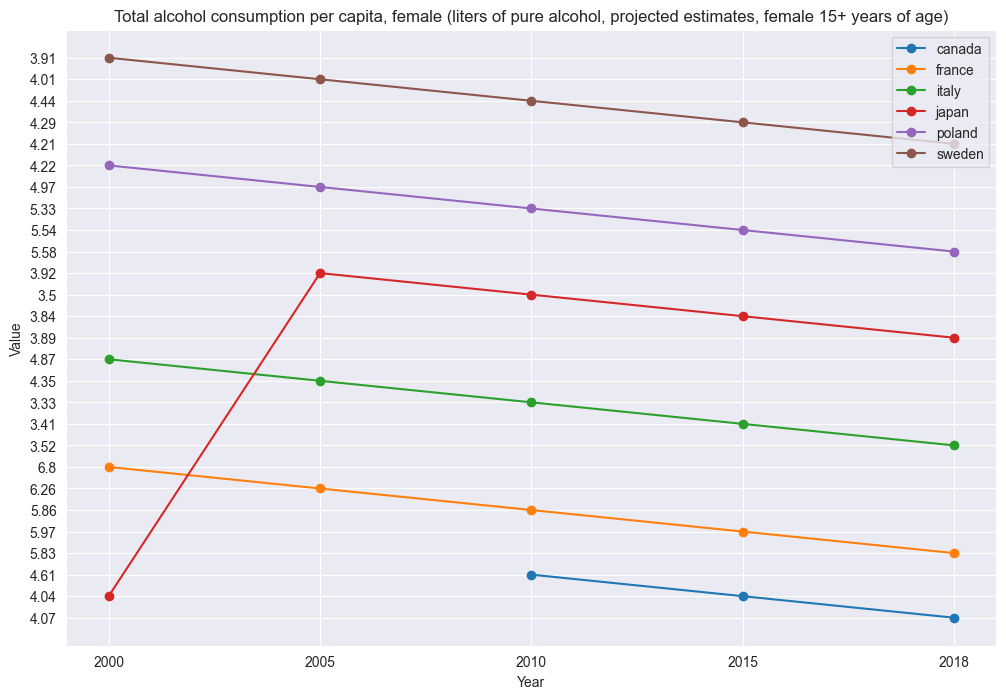

In [10]:

indicator_name = "Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)"
selected_countries = ['canada', 'france', 'italy', 'japan', 'poland', 'sweden']

plt.figure(figsize=(12, 8))


for country in selected_countries:
    selected_data = lista_health[country][lista_health[country]['Indicator Name'] == indicator_name]
    selected_data = selected_data.sort_values(by='Year', ascending=False)
    plt.plot(selected_data['Year'], selected_data['Value'], marker='o', linestyle='-', label=country)

plt.title(indicator_name)
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.gca().invert_xaxis()

plt.show()

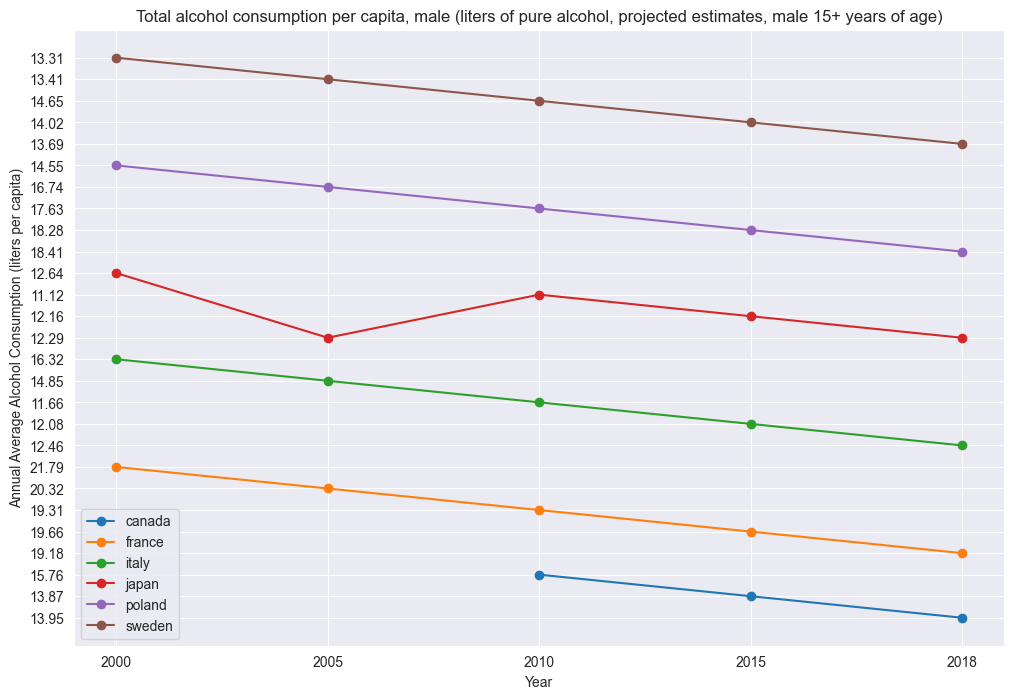

In [14]:
indicator_name = "Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)"
plt.figure(figsize=(12, 8))

for country in selected_countries:
    selected_data = lista_health[country][lista_health[country]['Indicator Name'] == indicator_name]
    selected_data = selected_data.sort_values(by='Year', ascending=False)
    plt.plot(selected_data['Year'], selected_data['Value'], marker='o', linestyle='-', label=country)

plt.title(indicator_name)
plt.xlabel('Year')
plt.ylabel('Annual Average Alcohol Consumption (liters per capita)')
plt.legend()
plt.grid(True)

plt.gca().invert_xaxis()

plt.show()

C:\Users\DuQer\AppData\Local\Temp\ipykernel_20592\4003998795.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


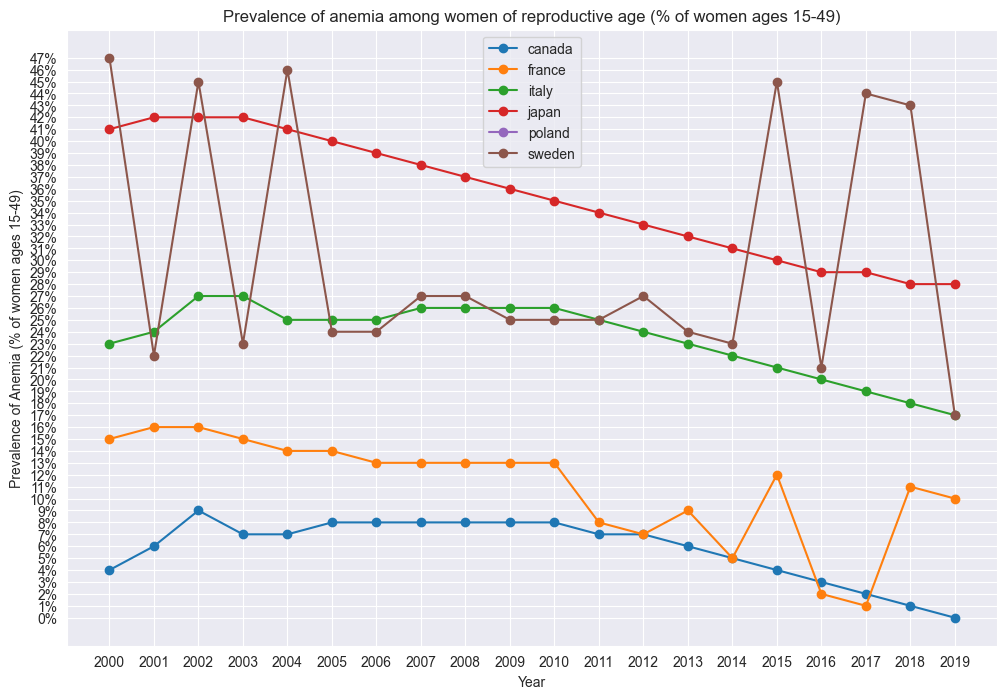

In [16]:
indicator_name = "Prevalence of anemia among women of reproductive age (% of women ages 15-49)"
# Create a figure with a specific size
plt.figure(figsize=(12, 8))

# Loop through selected countries and plot data
for country in selected_countries:
    # Filter data for the specific indicator and selected country
    selected_data = lista_health[country][lista_health[country]['Indicator Name'] == indicator_name]
    # Sort data by year in descending order
    selected_data = selected_data.sort_values(by='Year', ascending=False)
    # Plot the data
    plt.plot(selected_data['Year'], selected_data['Value'], marker='o', linestyle='-', label=country)

# Set chart title and axis labels
plt.title(indicator_name)
plt.xlabel('Year')
plt.ylabel('Prevalence of Anemia (% of women ages 15-49)')
plt.legend()  # Display legend
plt.grid(True)  # Display grid

# Invert x-axis to display years in descending order
plt.gca().invert_xaxis()

# Set y-axis to display percentage
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

# Display the chart
plt.show()